<a href="https://colab.research.google.com/github/94shreyas/Practise_Python/blob/main/Aerofit_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df=pd.read_csv('/content/Aerofit_Treadmill.csv')

# Step 1 Importing dataset and Data Analysis

In [27]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Step 2 : Detect Outliers and Identify relation ship between Product purchased and other metrics

Box plot to identify Outliers in Age/Education/Income/Fitness/MIles

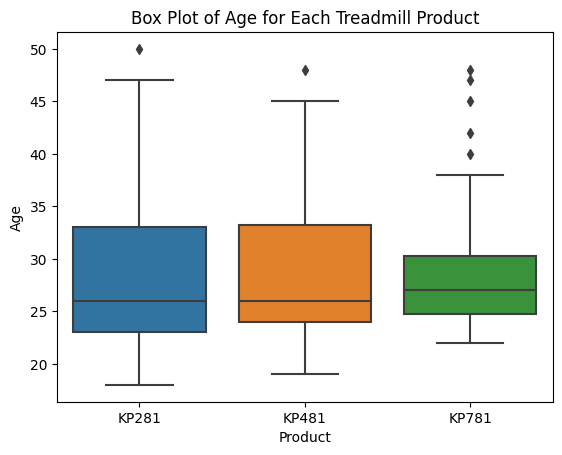

In [7]:
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Box Plot of Age for Each Treadmill Product')
plt.show()

Observation : It is observed that KP781 is purchased by the younger age group only (majorly 24-30)

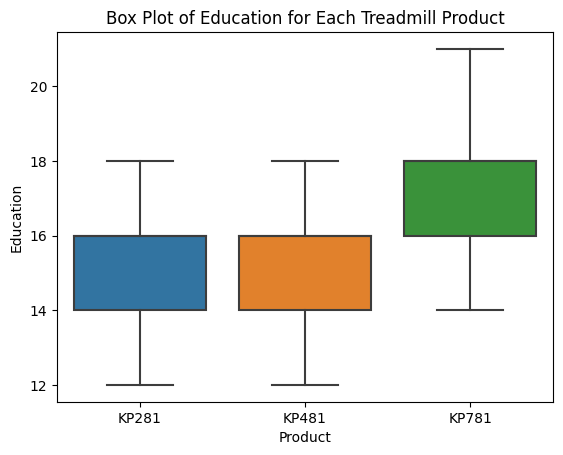

In [8]:
sns.boxplot(x='Product', y='Education', data=df)
plt.title('Box Plot of Education for Each Treadmill Product')
plt.show()

Observation : It is observed that KP781 is purchased by the higher education group

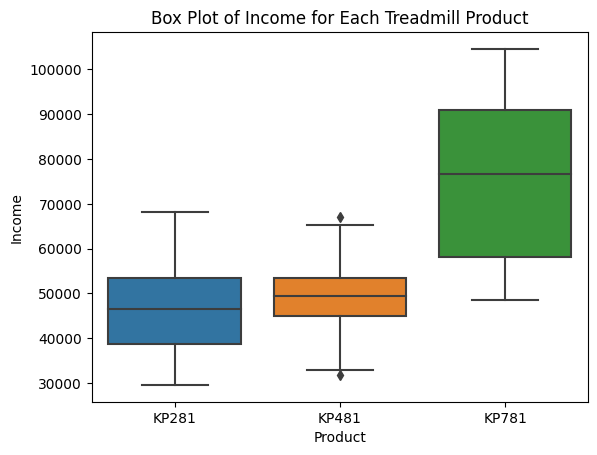

In [9]:
sns.boxplot(x='Product', y='Income', data=df)
plt.title('Box Plot of Income for Each Treadmill Product')
plt.show()

Observation : It is observed that KP781 is purchased by the higher income group, and KP481 by the medium income group

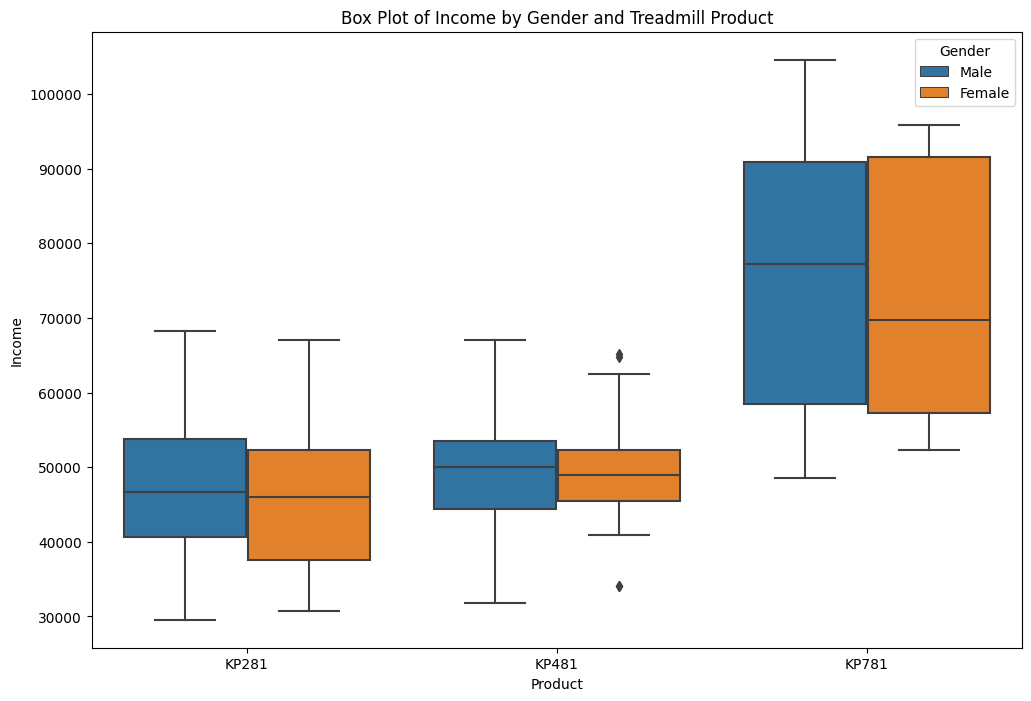

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product', y='Income', hue='Gender', data=df)
plt.title('Box Plot of Income by Gender and Treadmill Product')
plt.show()

Observation : Not much difference, Higher income group irrespective of gender prefer KP781

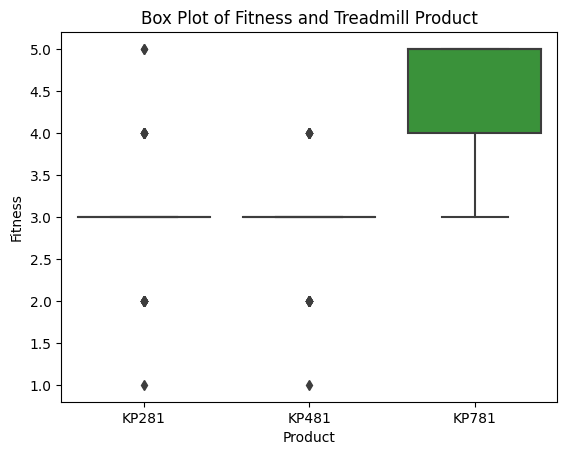

In [16]:
sns.boxplot(x='Product', y='Fitness', data=df)
plt.title('Box Plot of Fitness and Treadmill Product')
plt.show()

Observation : Customers whose fitness level are above 3 prefer KP781

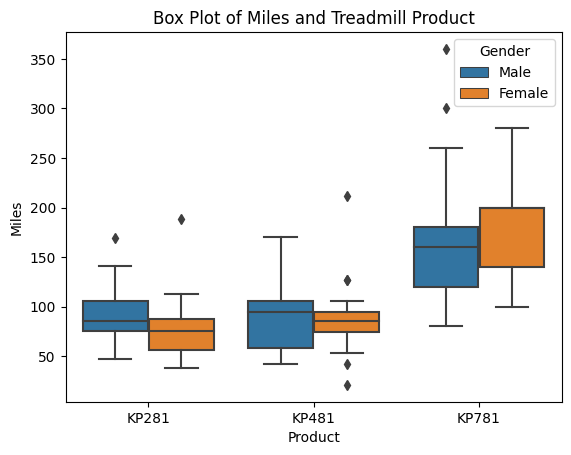

In [18]:
sns.boxplot(x='Product', y='Miles',hue='Gender', data=df)
plt.title('Box Plot of Miles and Treadmill Product')
plt.show()

Observation : Customers who run lower Miles prefer KP281 or KP481, Customers whorun higher Miler prefer KP781

# Step 3 : Explore Relationships between Features

<ipython-input-29-e991e0c643d2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


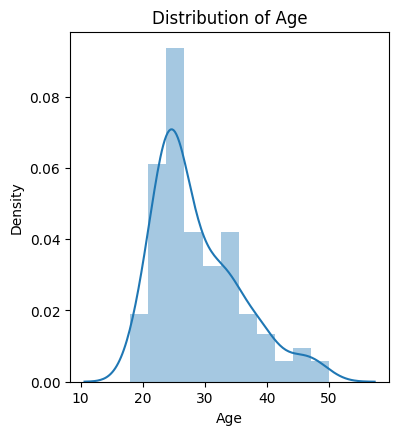

In [29]:
plt.figure(figsize=(14, 10))

# Univariate Analysis
plt.subplot(2, 3, 1)
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

Text(0.5, 1.0, 'Count of Customers by Marital Status')

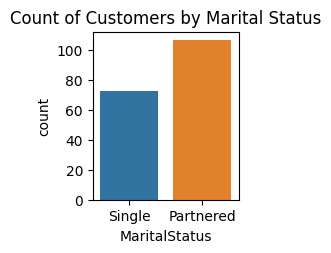

In [30]:
plt.subplot(2, 3, 2)
sns.countplot(x='MaritalStatus', data=df)
plt.title('Count of Customers by Marital Status')


Text(0.5, 1.0, 'Age Distribution by Product Purchased')

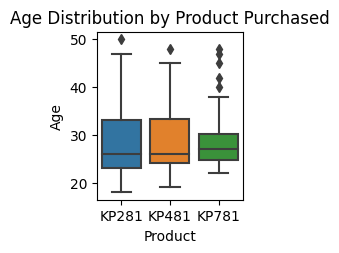

In [32]:
# Bivariate Analysis
plt.subplot(2, 3, 3)
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Age Distribution by Product Purchased')

Text(0.5, 1.0, 'Count of Products by Marital Status')

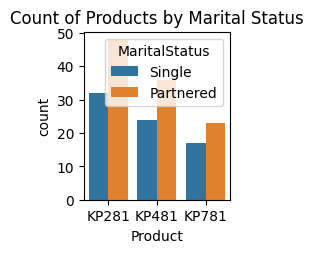

In [33]:
plt.subplot(2, 3, 4)
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Count of Products by Marital Status')

Text(0.5, 1.0, 'Correlation Heatmap')

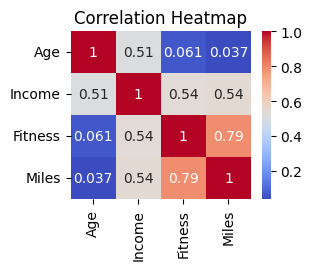

In [38]:
plt.subplot(2, 2, 4)
sns.heatmap(df[['Age', 'Income', 'Fitness', 'Miles']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

<ipython-input-40-96737a4813e8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


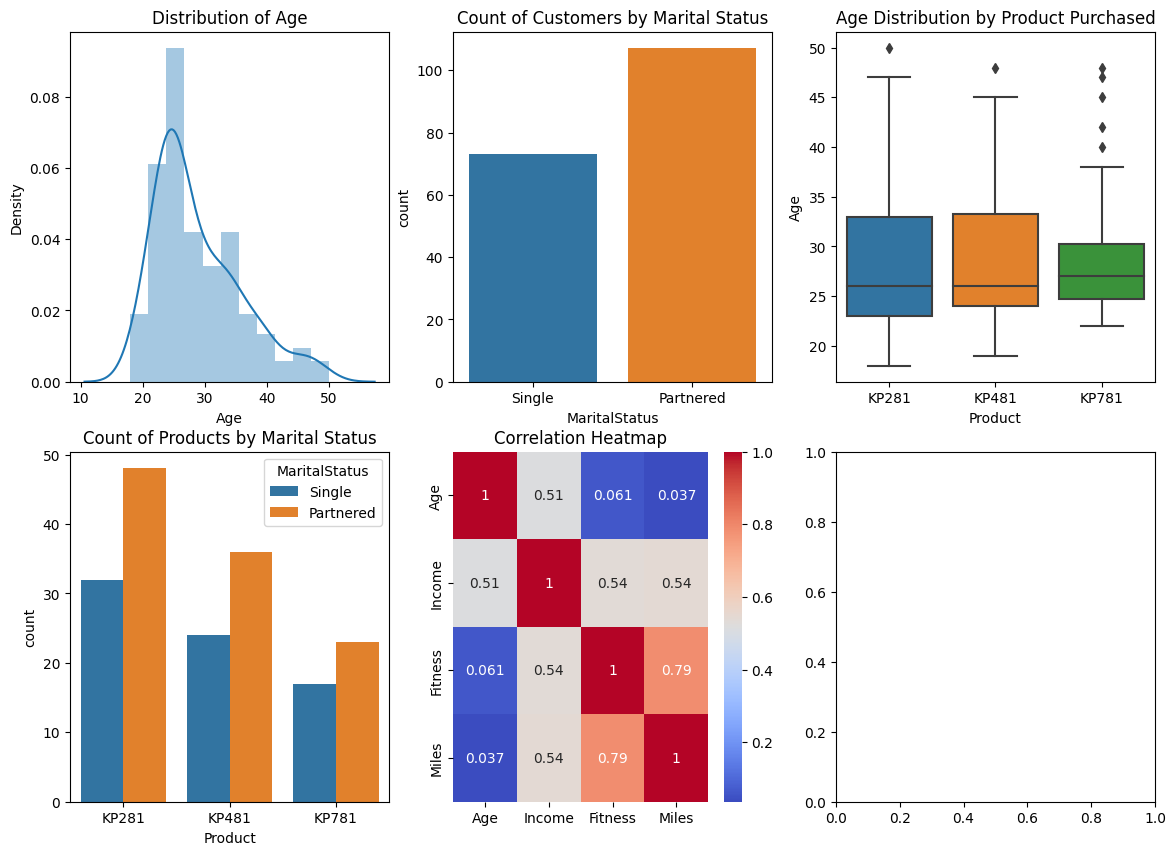

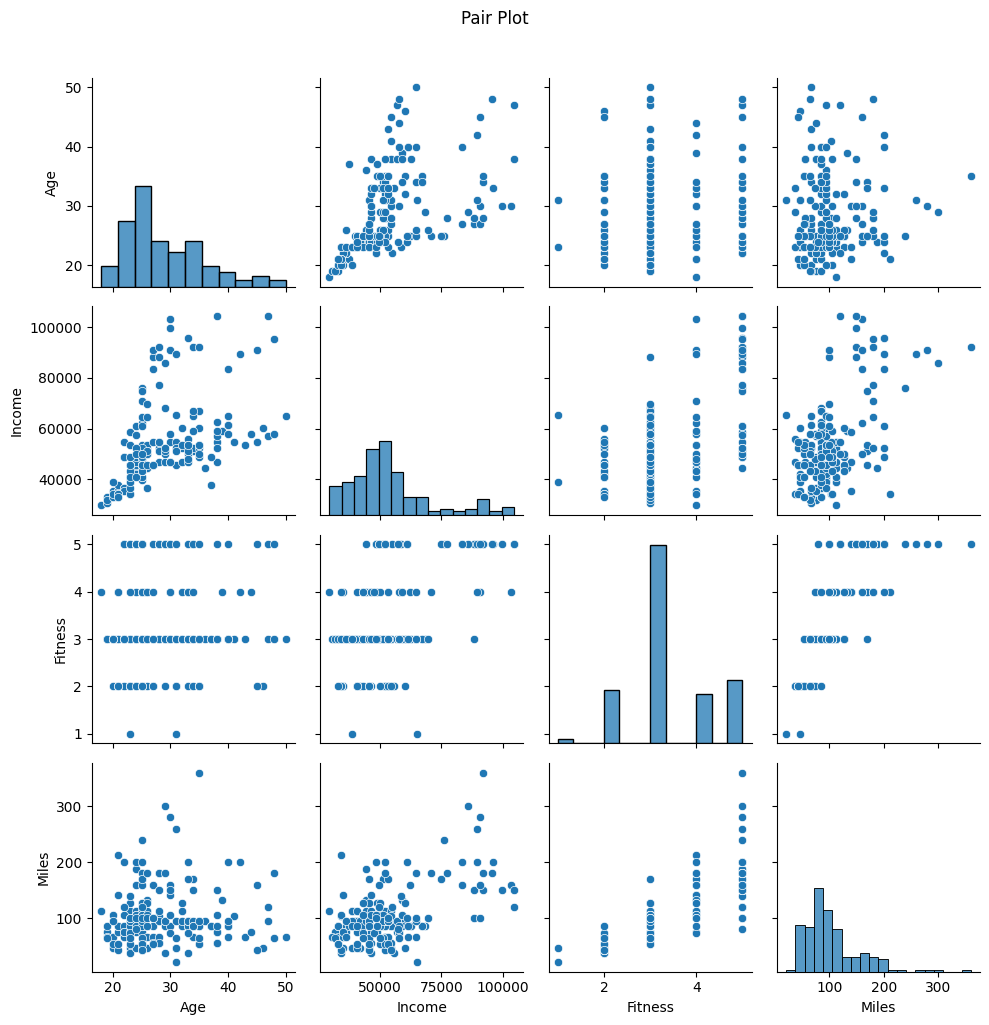

In [40]:
# Assuming df is your DataFrame
plt.figure(figsize=(14, 10))

# Univariate Analysis
plt.subplot(2, 3, 1)
sns.distplot(df['Age'])
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.countplot(x='MaritalStatus', data=df)
plt.title('Count of Customers by Marital Status')

# Bivariate Analysis
plt.subplot(2, 3, 3)
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Age Distribution by Product Purchased')

plt.subplot(2, 3, 4)
sns.countplot(x='Product', hue='MaritalStatus', data=df)
plt.title('Count of Products by Marital Status')

plt.subplot(2, 3, 5)
sns.heatmap(df[['Age', 'Income', 'Fitness', 'Miles']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.subplot(2, 3, 6)
sns.pairplot(df[['Age', 'Income', 'Fitness', 'Miles']])
plt.suptitle('Pair Plot', y=1.02)

plt.tight_layout()
plt.show()

# Step 4 : Representing Marginal Probabilities

In [41]:
contingency_table_gender = pd.crosstab(df['Product'], df['Gender'], margins=True, margins_name='Total')
print(contingency_table_gender)


Gender   Female  Male  Total
Product                     
KP281        40    40     80
KP481        29    31     60
KP781         7    33     40
Total        76   104    180


In [42]:
contingency_table_marital = pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, margins_name='Total')
print(contingency_table_marital)


MaritalStatus  Partnered  Single  Total
Product                                
KP281                 48      32     80
KP481                 36      24     60
KP781                 23      17     40
Total                107      73    180
